# Train Networks

- Train a deep classifier for the EEG-based diagnostic classification
    - CAUEEG-abnormal benchmark: Classification of **Normal** and **Abnormal** symptoms
    - CAUEEG-dementia benchmark: Classification of **Normal**, **MCI**, and **Dementia** symptoms

-----

## Load Packages

In [1]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%cd ..

C:\Users\Minjae\Desktop\EEG_Project


In [2]:
# Load some packages
import hydra
from omegaconf import OmegaConf
import wandb
import pprint

# custom package
from run_train import check_device_env
from run_train import prepare_and_run_train

---

## Specify the dataset, model, and train setting

In [4]:
project = 'caueeg-dementia'
data_cfg_file = 'caueeg-dementia'
train_cfg_file = 'tiny-amp'
model_cfg_file = '1D-DeiT-B-16'
device = 'cuda:0'

---

## Initializing configurations using Hydra

In [16]:
with hydra.initialize(config_path='../config'):
    add_configs = [f"data={data_cfg_file}", 
                   f"++data.seq_length=4000",
                   f"train={train_cfg_file}", 
                   f"+train.device={device}", 
                   f"+train.project={project}",
                   f"+train.distil_alpha=0.5",
                   f"+train.distil_type=soft",
                   f"+train.distil_tau=1.0",
                   f"+train.distil_teacher=1rn23vp7",
                   f"model={model_cfg_file}",
                   f"++model.criterion=multi-bce",]
    
    cfg = hydra.compose(config_name='default', overrides=add_configs)
    
config = {**OmegaConf.to_container(cfg.data), 
          **OmegaConf.to_container(cfg.train),
          **OmegaConf.to_container(cfg.model)}

check_device_env(config)
pprint.pprint(config)

{'EKG': 'O',
 '_target_': 'models.deit_1d.deit_b_16_1d',
 'activation': 'gelu',
 'attention_dropout': 0.1,
 'awgn': 0.001,
 'awgn_age': 0.001,
 'base_lr': 0.0001,
 'clip_grad_norm': 1.0,
 'criterion': 'multi-bce',
 'crop_multiple': 4,
 'crop_timing_analysis': False,
 'dataset_path': 'local/dataset/caueeg-dataset/',
 'ddp': False,
 'device': device(type='cuda', index=0),
 'distil_alpha': 0.5,
 'distil_tau': 1.0,
 'distil_teacher': '1rn23vp7',
 'distil_type': 'soft',
 'draw_result': True,
 'dropout': 0.1,
 'fc_stages': 2,
 'file_format': 'memmap',
 'in_channels': '???',
 'input_norm': 'dataset',
 'latency': 2000,
 'load_event': False,
 'lr_scheduler_type': 'constant_with_decay',
 'mgn': 0.001,
 'minibatch': 48,
 'minibatch_3090': 48,
 'mixed_precision': True,
 'mixup': 0.0,
 'model': '1D-DeiT-B-16',
 'num_history': 5,
 'out_dims': '???',
 'photic': 'X',
 'project': 'caueeg-dementia',
 'run_mode': 'train',
 'save_model': False,
 'search_lr': False,
 'search_multiplier': 1.0,
 'seed': 0,
 

## Train


******************************    Configurations for Train    ******************************

{'EKG': 'O',
 '_target_': 'models.deit_1d.deit_b_16_1d',
 'activation': 'gelu',
 'age_mean': tensor([71.2764]),
 'age_std': tensor([9.2399]),
 'attention_dropout': 0.1,
 'awgn': 0.001,
 'awgn_age': 0.001,
 'base_lr': 0.0001,
 'class_label_to_name': ['Normal', 'MCI', 'Dementia'],
 'class_name_to_label': {'Dementia': 2, 'MCI': 1, 'Normal': 0},
 'clip_grad_norm': 1.0,
 'criterion': 'multi-bce',
 'crop_multiple': 4,
 'crop_timing_analysis': False,
 'dataset_name': 'CAUEEG dataset',
 'dataset_path': 'local/dataset/caueeg-dataset/',
 'ddp': False,
 'device': device(type='cuda', index=0),
 'distil_alpha': 0.5,
 'distil_tau': 1.0,
 'distil_teacher': '1rn23vp7',
 'distil_teacher_criterion': 'multi-bce',
 'distil_teacher_model': VGG2D(
  (conv_stage1): Sequential(
    (0): Conv2d(41, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, aff

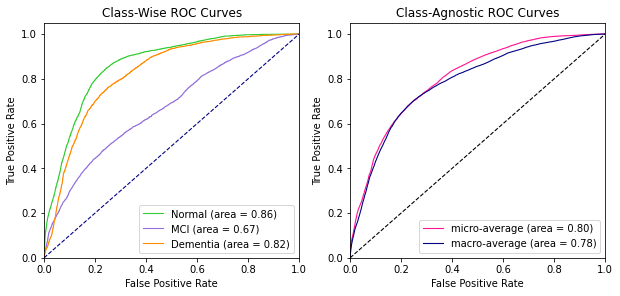

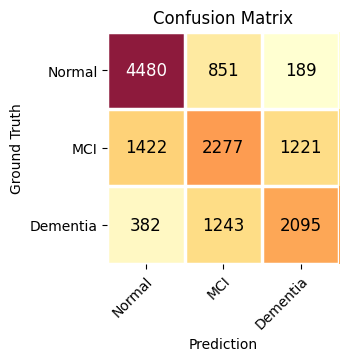

In [20]:
prepare_and_run_train(rank=None, world_size=None, config=config)